In [ ]:
!gdown "https://drive.google.com/uc?id=1P-oVR0J35Dw40lzw47sE19oADSW-tyb1&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1P-oVR0J35Dw40lzw47sE19oADSW-tyb1&confirm=t
To: /content/demo.mp4
100% 9.56M/9.56M [00:00<00:00, 12.2MB/s]


In [1]:
folder_path = "."

In [7]:
import cv2 as cv
from glob import glob
import os
import random
import torch
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/oscarcampohermoso/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Pre-Trained YOLOv8

In [1]:
# read in video paths
videos = glob(folder_path + '/inputs/*.mp4')
print(videos)

NameError: name 'glob' is not defined

In [ ]:
# pick pre-trained model
model_pretrained = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 309MB/s]


In [ ]:
# read video by index
video = cv.VideoCapture(videos[0])

# get video dimensions
frame_width = int(video.get(3))
frame_height = int(video.get(4))
size = (frame_width, frame_height)

# Define the codec and create VideoWriter object for MP4
fourcc = cv.VideoWriter_fourcc(*'mp4v')  # MP4 codec
output_path = os.path.join(folder_path, 'outputs', 'demo.mp4')
out = cv.VideoWriter(output_path, fourcc, 20.0, size)

ret = True
while ret:
    ret, frame = video.read()

    if ret:
        results = model_pretrained.track(frame, persist=True)
        composed = results[0].plot()

        # save video
        out.write(composed)

# Release everything once job is finished
out.release()
video.release()

print(f"Video saved at: {output_path}")

requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 176.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.5s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


0: 416x640 2 cars, 121.7ms
Speed: 16.5ms preprocess, 121.7ms inference, 1131.2ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 11.3ms
Speed: 3.7ms preprocess, 11.3ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 12.3ms
Speed: 5.1ms preprocess, 12.3ms inference, 3.3ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 11.4ms
Speed: 4.1ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 12.5ms
Speed: 4.3ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 8.3ms
Speed: 4.4ms preprocess

# Retraining YOLOv8

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cpu


In [5]:
dataset = folder_path+ '/data.yaml'

# load a model
# backbone = YOLO("yolov8n.yaml")  # build a new model from scratch
backbone = YOLO("yolov8n.pt")  # load a pre-trained model (recommended for training)

In [6]:
# Use the model
results = backbone.train(data=dataset, epochs=20, device=device)  # train the model

Ultralytics 8.3.9  Python-3.10.13 torch-2.4.1+cpu CPU (Intel Core(TM) i5-8400 2.80GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=./data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

train: Scanning D:\development\computer-vision\license-plate-imgs\train\labels.cache... 21173 images, 28 backgrounds, 0 corrupt: 100%|██████████| 21173/21173 [00:00<?, ?it/s]
val: Scanning D:\development\computer-vision\license-plate-imgs\valid\labels.cache... 2046 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2046/2046 [00:00<?, ?it/s]


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.494      3.813      1.495         24        640:   6%|▌         | 79/1324 [07:32<1:58:48,  5.73s/it]


KeyboardInterrupt: 

In [ ]:
model_save_path = folder_path + '/runs/trained_yolov8n.pt'  # Save in your drive folder
backbone.model.save(model_save_path)  # Manually save the trained model

print(f"Model saved to {model_save_path}")

In [ ]:
# Evaluate the model's performance on the validation set
results = backbone.val()

In [ ]:
# Perform object detection on an image using the model
results = backbone('inputs/car.png')

In [ ]:
# Export the model to ONNX format
# success = model.export(imgsz=(640, 480), format='onnx', opset=12, optimize=False, half=False)
# Export to PyTorch format
success = backbone.export(imgsz=640, format='torchscript', optimize=False, half=False, int8=False)
# TorchScript: export success ✅ 1.5s, saved as 'runs/detect/train11/weights/best.torchscript' (11.9 MB)

In [ ]:
# pick pre-trained model
np_model = YOLO('runs/detect/train11/weights/best.torchscript')

In [ ]:
# read video by index
video = cv.VideoCapture(videos[0])

# get video dimensions
frame_width = int(video.get(3))
frame_height = int(video.get(4))
size = (frame_width, frame_height)

# Define the codec and create VideoWriter object for MP4
fourcc = cv.VideoWriter_fourcc(*'mp4v')  # MP4 codec
output_path = os.path.join(folder_path, 'outputs', 'demo-2.mp4')
out = cv.VideoWriter(output_path, fourcc, 20.0, size)

ret = True
while ret:
    ret, frame = video.read()

    if ret:
        results = model_pretrained.track(frame, persist=True)
        composed = results[0].plot()

        # save video
        out.write(composed)

# Release everything once job is finished
out.release()
video.release()

print(f"Video saved at: {output_path}")

# Improving Training Results

In [ ]:
# unzip downloaded dataset to `./datasets`
dataset = 'datasets/data.yaml'

# load a model
# backbone = YOLO("yolov8n.yaml")  # build a new model from scratch
backbone_small = YOLO("yolov8s.pt")  # load a pre-trained model (recommended for training)

In [ ]:
# Use the model
results_medium = backbone_small.train(data=dataset, epochs=100)  # train the model

In [ ]:
# pick pre-trained model
np2_model = YOLO('runs/detect/train4/weights/best.pt')

In [ ]:
# Evaluate the model's performance on the validation set
results = np2_model.val()

# License Plate Detection

In [10]:
import ast
import cv2 as cv
import easyocr
from glob import glob
import numpy as np
import pandas as pd
import string
from ultralytics import YOLO

In [13]:
# regular pre-trained yolov8 model for car recognition
# coco_model = YOLO('yolov8n.pt')
coco_model = YOLO('yolov8s.pt')
# yolov8 model trained to detect number plates
np_model = YOLO(folder_path + '/runs/detect/train/weights/best.pt')

In [14]:
# read in test video paths
videos = glob(folder_path + '/inputs/*.mp4')
print(videos)

['./inputs/demo.mp4']


# STEP 1 Implementing the Car Detection

In [16]:
# read video by index
video = cv.VideoCapture(videos[0])

ret = True
frame_number = -1
# all vehicle class IDs from the COCO dataset (car, motorbike, truck) https://docs.ultralytics.com/datasets/detect/coco/#dataset-yaml
vehicles = [2,3,5]
vehicle_bounding_boxes = []

# read the 10 first frames
while ret:
    frame_number += 1
    ret, frame = video.read()

    if ret and frame_number < 10:
        # use track() to identify instances and track them frame by frame
        detections = coco_model.track(frame, persist=True)[0]
        # save cropped detections
        # detections.save_crop('outputs')
        # print nodel predictions for debugging
        # print(results)

        for detection in detections.boxes.data.tolist():
            # print detection bounding boxes for debugging
            # print(detection)
            x1, y1, x2, y2, track_id, score, class_id = detection
            # I am only interested in class IDs that belong to vehicles
            if int(class_id) in vehicles and score > 0.5:
                vehicle_bounding_boxes.append([x1, y1, x2, y2, track_id, score])

# print found bounding boxes for debugging
print(vehicle_bounding_boxes)
video.release()

requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.4 MB/s eta 0:00:002.3 MB/s eta 0:00:01

requirements: AutoUpdate success ✅ 2.6s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


0: 416x640 2 cars, 101.6ms
Speed: 1.7ms preprocess, 101.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 90.0ms
Speed: 1.3ms preprocess, 90.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 85.8ms
Speed: 1.6ms preprocess, 85.8ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 88.2ms
Speed: 1.6ms preprocess, 88.2ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 87.2ms
Speed: 1.4ms preprocess, 87.2ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 86.9ms
Speed: 2

# STEP 2 Implementing the License Plate Detection

In [17]:
# read video by index
video = cv.VideoCapture(videos[0])

ret = True
frame_number = -1
vehicles = [2,3,5]

# read the 10 first frames
while ret:
    frame_number += 1
    ret, frame = video.read()

    if ret and frame_number < 10:

        # vehicle detector
        detections = coco_model.track(frame, persist=True)[0]
        for detection in detections.boxes.data.tolist():
            x1, y1, x2, y2, track_id, score, class_id = detection
            if int(class_id) in vehicles and score > 0.5:
                vehicle_bounding_boxes = []
                vehicle_bounding_boxes.append([x1, y1, x2, y2, track_id, score])
                for bbox in vehicle_bounding_boxes:
                    print(bbox)
                    roi = frame[int(y1):int(y2), int(x1):int(x2)]
                    # debugging check if bbox lines up with detected vehicles (should be identical to save_crops() above
                    # cv.imwrite(str(track_id) + '.jpg', roi)

                    # license plate detector for region of interest
                    license_plates = np_model(roi)[0]
                    # check every bounding box for a license plate
                    for license_plate in license_plates.boxes.data.tolist():
                        plate_x1, plate_y1, plate_x2, plate_y2, plate_score, _ = license_plate
                        # verify detections
                        print(license_plate, 'track_id: ' + str(bbox[4]))
                        plate = roi[int(plate_y1):int(plate_y2), int(plate_x1):int(plate_x2)]
                        cv.imwrite(str(track_id) + '.jpg', plate)

video.release()


0: 416x640 2 cars, 92.1ms
Speed: 1.4ms preprocess, 92.1ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)
[78.8670425415039, 98.34742736816406, 257.88592529296875, 228.0613555908203, 1.0, 0.9115678071975708]

0: 480x640 (no detections), 50.1ms
Speed: 1.3ms preprocess, 50.1ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)
[121.54373931884766, 194.65066528320312, 866.6505126953125, 601.441162109375, 2.0, 0.8866708278656006]

0: 352x640 1 License_Plate, 35.1ms
Speed: 1.5ms preprocess, 35.1ms inference, 0.4ms postprocess per image at shape (1, 3, 352, 640)
[473.9349365234375, 328.672119140625, 666.0717163085938, 395.7479553222656, 0.7544417381286621, 0.0] track_id: 2.0

0: 416x640 2 cars, 91.3ms
Speed: 1.4ms preprocess, 91.3ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)
[78.89811706542969, 97.56342315673828, 262.391357421875, 231.3226776123047, 1.0, 0.9144792556762695]

0: 480x640 (no detections), 49.0ms
Speed: 1.6ms preprocess, 49.0

# STEP 3 Preprocess License Plates

In [19]:
# read video by index
video = cv.VideoCapture(videos[0])

ret = True
frame_number = -1
vehicles = [2, 3, 5]

# read the 10 first frames
while ret:
    frame_number += 1
    ret, frame = video.read()

    if ret and frame_number < 100:

        # vehicle detector
        detections = coco_model.track(frame, persist=True)[0]
        for detection in detections.boxes.data.tolist():
            if len(detection) == 7:
                x1, y1, x2, y2, track_id, score, class_id = detection
            else:
                x1, y1, x2, y2, score, class_id = detection
                track_id = None  # Asignar un valor por defecto si no hay track_id

            if int(class_id) in vehicles and score > 0.5:
                vehicle_bounding_boxes = []
                vehicle_bounding_boxes.append([x1, y1, x2, y2, track_id, score])
                for bbox in vehicle_bounding_boxes:
                    print(bbox)
                    roi = frame[int(y1):int(y2), int(x1):int(x2)]

                    # license plate detector for region of interest
                    license_plates = np_model(roi)[0]
                    # process license plate
                    for license_plate in license_plates.boxes.data.tolist():
                        plate_x1, plate_y1, plate_x2, plate_y2, plate_score, _ = license_plate
                        # crop plate from region of interest
                        plate = roi[int(plate_y1):int(plate_y2), int(plate_x1):int(plate_x2)]
                        # de-colorize
                        plate_gray = cv.cvtColor(plate, cv.COLOR_BGR2GRAY)
                        # posterize
                        _, plate_treshold = cv.threshold(plate_gray, 64, 255, cv.THRESH_BINARY_INV)
                        cv.imwrite(str(track_id) + '_gray.jpg', plate_gray)
                        cv.imwrite(str(track_id) + '_thresh.jpg', plate_treshold)

video.release()


0: 416x640 1 car, 88.5ms
Speed: 1.8ms preprocess, 88.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
[92.21528625488281, 202.58029174804688, 923.76513671875, 658.303955078125, 3.0, 0.8866708278656006]

0: 352x640 1 License_Plate, 35.1ms
Speed: 1.8ms preprocess, 35.1ms inference, 0.3ms postprocess per image at shape (1, 3, 352, 640)

0: 416x640 2 cars, 84.7ms
Speed: 1.4ms preprocess, 84.7ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)
[110.20932006835938, 222.48452758789062, 941.0926513671875, 658.1541748046875, 3.0, 0.8972876667976379]

0: 352x640 1 License_Plate, 33.0ms
Speed: 1.2ms preprocess, 33.0ms inference, 0.3ms postprocess per image at shape (1, 3, 352, 640)
[79.95747375488281, 97.43531799316406, 262.3258056640625, 231.218505859375, 4.0, 0.9144792556762695]

0: 480x640 (no detections), 60.6ms
Speed: 15.7ms preprocess, 60.6ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 416x640 2 cars, 90.1ms
Speed: 1.4ms preproce

# STEP 4 Read License Plates

In [20]:
# Initialize the OCR reader
reader = easyocr.Reader(['en'], gpu=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [21]:
def read_license_plate(license_plate_crop):
    detections = reader.readtext(license_plate_crop)

    for detection in detections:
        bbox, text, score = detection

        text = text.upper().replace(' ', '')

        return text, score

    return None, None

In [22]:
def write_csv(results, output_path):

    with open(output_path, 'w') as f:
        f.write('{},{},{},{},{},{},{},{}\n'.format(
            'frame_number', 'track_id', 'car_bbox', 'car_bbox_score',
            'license_plate_bbox', 'license_plate_bbox_score', 'license_plate_number',
            'license_text_score'))

        for frame_number in results.keys():
            for track_id in results[frame_number].keys():
                print(results[frame_number][track_id])
                if 'car' in results[frame_number][track_id].keys() and \
                   'license_plate' in results[frame_number][track_id].keys() and \
                   'number' in results[frame_number][track_id]['license_plate'].keys():
                    f.write('{},{},{},{},{},{},{},{}\n'.format(
                        frame_number,
                        track_id,
                        '[{} {} {} {}]'.format(
                            results[frame_number][track_id]['car']['bbox'][0],
                            results[frame_number][track_id]['car']['bbox'][1],
                            results[frame_number][track_id]['car']['bbox'][2],
                            results[frame_number][track_id]['car']['bbox'][3]
                        ),
                        results[frame_number][track_id]['car']['bbox_score'],
                        '[{} {} {} {}]'.format(
                            results[frame_number][track_id]['license_plate']['bbox'][0],
                            results[frame_number][track_id]['license_plate']['bbox'][1],
                            results[frame_number][track_id]['license_plate']['bbox'][2],
                            results[frame_number][track_id]['license_plate']['bbox'][3]
                        ),
                        results[frame_number][track_id]['license_plate']['bbox_score'],
                        results[frame_number][track_id]['license_plate']['number'],
                        results[frame_number][track_id]['license_plate']['text_score'])
                    )
        f.close()

In [11]:
results = {}

# read video by index
video = cv.VideoCapture(videos[0])

ret = True
frame_number = -1
vehicles = [2, 3, 5]

# read the 10 first frames
while ret:
    frame_number += 1
    ret, frame = video.read()

    if ret and frame_number < 100:

        # vehicle detector
        detections = coco_model.track(frame, persist=True)[0]
        for detection in detections.boxes.data.tolist():
            if len(detection) == 7:
                x1, y1, x2, y2, track_id, score, class_id = detection
            else:
                x1, y1, x2, y2, score, class_id = detection
                track_id = None  # Asignar un valor por defecto si no hay track_id

            if int(class_id) in vehicles and score > 0.3:
                vehicle_bounding_boxes = []
                vehicle_bounding_boxes.append([x1, y1, x2, y2, track_id, score])
                for bbox in vehicle_bounding_boxes:
                    print(bbox)
                    roi = frame[int(y1):int(y2), int(x1):int(x2)]

                    # license plate detector for region of interest
                    license_plates = np_model(roi)[0]
                    # process license plate
                    for license_plate in license_plates.boxes.data.tolist():
                        plate_x1, plate_y1, plate_x2, plate_y2, plate_score, _ = license_plate
                        # crop plate from region of interest
                        plate = roi[int(plate_y1):int(plate_y2), int(plate_x1):int(plate_x2)]
                        # de-colorize
                        plate_gray = cv.cvtColor(plate, cv.COLOR_BGR2GRAY)
                        # posterize
                        _, plate_treshold = cv.threshold(plate_gray, 64, 255, cv.THRESH_BINARY_INV)
                        cv.imwrite(str(track_id) + '_gray.jpg', plate_gray)
                        cv.imwrite(str(track_id) + '_thresh.jpg', plate_treshold)

video.release()

NameError: name 'videos' is not defined

# STEP 5 Clean-Up License Plate Format

In [151]:
# Mapping dictionaries for character conversion
# characters that can easily be confused can be
# verified by their location - an `O` in a place
# where a number is expected is probably a `0`
dict_char_to_int = {
    'O': '0',
    'I': '1',
    'J': '3',
    'A': '4',
    'G': '6',
    'S': '5',
    'T': '7',
    'B': '8',
    'P': '9',
    'Z': '2',
    'D': '0',
    'Q': '9',
    'C': '6',
    'L': '1', 
}

dict_int_to_char = {
    '0': 'O',
    '1': 'I',
    '3': 'J',
    '4': 'A',
    '6': 'G',
    '5': 'S',
    '8': 'B',
    '9': 'P',
    '2': 'Z',  
}

In [147]:
def license_complies_format(text):
    print("Checking license plate format:")
    print(text)

    # Ensure the text is uppercase
    text = text.upper()

    # Check if the text is empty
    if not text:
        print("License plate format is incorrect.")
        return False

    # Split the text into digits and letters
    digits_part = ""
    letters_part = ""
    for char in text:
        if char in '0123456789' or char in dict_char_to_int.keys():
            digits_part += char
        elif char in string.ascii_uppercase or char in dict_int_to_char.keys():
            letters_part += char
        else:
            print("License plate format is incorrect.")
            return False

    # Check if there are digits at the beginning and letters at the end
    if digits_part and letters_part:
        print("License plate format is correct.")
        print("License plate: ", text)
        return True
    else:
        print("License plate format is incorrect.")
        return False

In [148]:
def format_license(text):
    """
    Format the Bolivian license plate by converting confused characters.
    The first part contains 3 or 4 digits, and the last part contains exactly 3 letters.
    Returns the formatted plate.
    """
    text = text.strip().upper()
    formatted_text = []
    length = len(text)

    # Convert the last 3 characters to letters if they are numbers
    for i in range(length - 1, length - 4, -1):
        if i >= 0 and text[i] in dict_int_to_char:
            formatted_text.append(dict_int_to_char[text[i]])
        elif i >= 0:
            formatted_text.append(text[i])

    # Convert the remaining characters to digits if they are letters
    for i in range(length - 4, -1, -1):
        if text[i] in dict_char_to_int:
            formatted_text.append(dict_char_to_int[text[i]])
        else:
            formatted_text.append(text[i])

    # Reverse the list to get the correct order
    formatted_text.reverse()

    # Combine formatted characters
    formatted_plate = ''.join(formatted_text)

    return formatted_plate

In [149]:
def clean_license_plate_text(text):
    """
    Clean the license plate text by removing any characters that are not digits or uppercase letters.
    """
    valid_chars = '0123456789' + string.ascii_uppercase
    cleaned_text = ''.join(char for char in text if char in valid_chars)
    return cleaned_text

In [186]:
!pip install --force-reinstall -v "tensorflow==2.15.1"

Using pip 23.3.1 from /Users/oscarcampohermoso/miniconda3/envs/classification/lib/python3.10/site-packages/pip (python 3.10)
  Obtaining dependency information for tensorflow==2.15.1 from https://files.pythonhosted.org/packages/54/38/2be65dc6f47e6aa0fb0494877676774f8faa685c08a5cecf0c0040afccbc/tensorflow-2.15.1-cp310-cp310-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata


In [91]:
import keras_ocr
import numpy as np

# Initialize the Keras-OCR pipeline
pipeline = keras_ocr.pipeline.Pipeline()

def read_license_plate(license_plate_crop):
    # Convert the cropped image to a format suitable for Keras-OCR
    license_plate_crop = np.array(license_plate_crop)

    # Ensure the image has 3 channels (RGB)
    if len(license_plate_crop.shape) == 2:  # If grayscale, convert to RGB
        license_plate_crop = np.stack((license_plate_crop,) * 3, axis=-1)

    # Perform OCR on the cropped license plate image
    prediction_groups = pipeline.recognize([license_plate_crop])
    detections = prediction_groups[0]  # Get the first (and only) group of predictions

    for detection in detections:
        bbox, text = detection

        # Ensure text is a string
        text = str(text)

        # Process the text: convert to uppercase and remove spaces
        text = text.upper().replace(' ', '')
        text = clean_license_plate_text(text)
        print("Text: ", text)
        
        # Verify if the detected text matches a valid license plate format
        if license_complies_format(text):
            # If valid, return the formatted license plate
            print("Valid license plate detected: ", text)
            return format_license(text), 1.0

    # If no valid license plate is found, return None
    return None, None

Looking for /Users/oscarcampohermoso/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/oscarcampohermoso/.keras-ocr/crnn_kurapan.h5


In [126]:
import easyocr
reader = easyocr.Reader(['es'])  # Specify the language for OCR

def read_license_plate(license_plate_crop):
    # Perform OCR on the cropped license plate image
    detections = reader.readtext(license_plate_crop)
    print(detections)

    for detection in detections:
        bbox, text, score = detection

        # Process the text: convert to uppercase and remove spaces
        text = text.upper().replace(' ', '')
        text = clean_license_plate_text(text)
        print("Text: ", text, "Score: ", score)
        
        #Verify if the detected text matches a valid license plate format
        return format_license(text), score

    # If no valid license plate is found, return None
    return None, None

In [142]:
import cv2
import matplotlib.pyplot as plt

# Example preprocessing function
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply GaussianBlur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Apply Otsu's thresholding
    # threshold(src, thresh, maxval, type[, dst]) -> retval, dst
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    height = thresh.shape[0]
    width = thresh.shape[1]
    # Remove part of the bottom and part of the top of the license plate
    cropped_plate = thresh[int(height * 0.35):int(height * 0.85), int(width * 0.05):int(width * 0.95)]
    
    plt.imshow(cropped_plate, cmap='gray')
    plt.axis('off')
    plt.show()
    return cropped_plate


0: 640x512 1 car, 132.5ms
Speed: 2.1ms preprocess, 132.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)
0.8296681642532349 2.0

0: 640x608 1 License_Plate, 53.6ms
Speed: 1.9ms preprocess, 53.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 608)


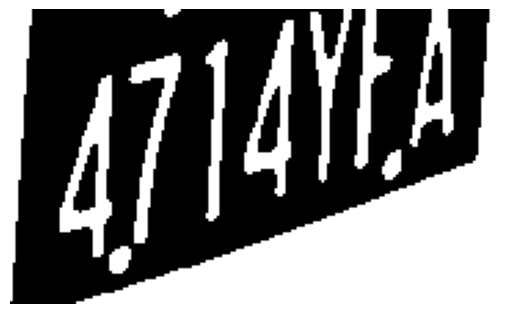

[([[-6.5897907930886905, 18.666543937969404], [171.77244870707486, -24.291982286679644], [187.5897907930887, 63.33345606203059], [9.227551292925146, 107.29198228667964]], '74714Y+48', 0.1651719021678032)]
Text:  74714Y48 Score:  0.1651719021678032
74714YAB 0.1651719021678032


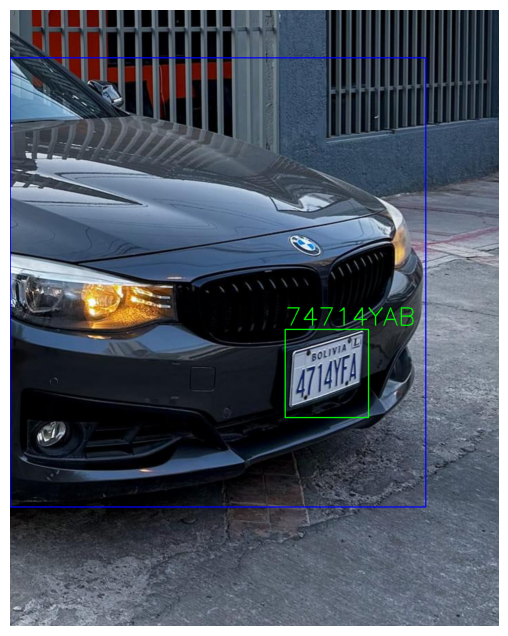

In [153]:
import cv2 as cv
import matplotlib.pyplot as plt
import string
import easyocr
from ultralytics import YOLO

coco_model = YOLO('yolov8s.pt')  # Pre-trained YOLO model for car detection
np_model = YOLO('./runs/detect/train/weights/best.pt')

# Load the static image
image_path = './img/4714YFA.jpg'
image = cv.imread(image_path)

# Ensure tracking logic is bypassed
coco_model.callbacks = {}  # Remove any callbacks related to tracking

# Detect vehicles in the static image
vehicles = [2, 3, 5, 7]  # Define vehicle class IDs (e.g., cars, trucks)
results = {}

# Vehicle detector (using predict instead of track)
detections = coco_model.predict(image)[0]  # Make sure this is just detection, no tracking
vehicle_bounding_boxes = []

for detection in detections.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = detection
    print(score, class_id)
    if int(class_id) in vehicles and score > 0.5:
        vehicle_bounding_boxes.append([x1, y1, x2, y2, None, score])  # track_id is None
        # Crop the vehicle's region of interest (ROI)
        roi = image[int(y1):int(y2), int(x1):int(x2)]

        # License plate detector for the region of interest
        license_plates = np_model.predict(roi)[0]

        # Process license plate
        for license_plate in license_plates.boxes.data.tolist():
            plate_x1, plate_y1, plate_x2, plate_y2, plate_score, _ = license_plate

            # Crop the plate from the region of interest
            plate = roi[int(plate_y1):int(plate_y2), int(plate_x1):int(plate_x2)]

            # Put filters on the plate
            new_image = preprocess_image(plate)

            # OCR to read the license plate text
            np_text, np_score = read_license_plate(new_image)
            print(np_text, np_score)
            # If plate is readable, store results
            if np_text is not None:
                results[None] = {  # track_id is None
                    'car': {
                        'bbox': [x1, y1, x2, y2],
                        'bbox_score': score
                    },
                    'license_plate': {
                        'bbox': [plate_x1, plate_y1, plate_x2, plate_y2],
                        'bbox_score': plate_score,
                        'number': np_text,
                        'text_score': np_score
                    }
                }

                # Draw vehicle and license plate bounding boxes on the image
                cv.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
                cv.rectangle(roi, (int(plate_x1), int(plate_y1)), (int(plate_x2), int(plate_y2)), (0, 255, 0), 2)
                cv.putText(roi, np_text, (int(plate_x1), int(plate_y1 - 10)), cv.FONT_HERSHEY_SIMPLEX, 2.0, (0, 255, 0), 2)

# If no vehicles were detected, try to detect license plates in the whole image
if not vehicle_bounding_boxes:
    print("No vehicles detected, trying to detect license plates in the whole image.")
    license_plates = np_model.predict(image)[0]
    for license_plate in license_plates.boxes.data.tolist():
        plate_x1, plate_y1, plate_x2, plate_y2, plate_score, _ = license_plate

        # Crop the plate from the whole image
        plate = image[int(plate_y1):int(plate_y2), int(plate_x1):int(plate_x2)]

        # Put filters on the plate
        new_image = preprocess_image(plate)

        # OCR to read the license plate text
        np_text, np_score = read_license_plate(new_image)
        # show cropped plate

        print(np_text, np_score)
        # If plate is readable, store results
        if np_text is not None:
            results[None] = {  # track_id is None
                'car': {
                    'bbox': [0, 0, image.shape[1], image.shape[0]],  # Whole image
                    'bbox_score': 1.0  # Full confidence since no vehicle detection
                },
                'license_plate': {
                    'bbox': [plate_x1, plate_y1, plate_x2, plate_y2],
                    'bbox_score': plate_score,
                    'number': np_text,
                    'text_score': np_score
                }
            }

            # Draw license plate bounding box on the image
            cv.rectangle(image, (int(plate_x1), int(plate_y1)), (int(plate_x2), int(plate_y2)), (0, 255, 0), 2)
            cv.putText(image, np_text, (int(plate_x1), int(plate_y1 - 10)), cv.FONT_HERSHEY_SIMPLEX, 3.0, (0, 255, 0), 2)

# Show the resulting image with detections in the notebook
plt.figure(figsize=(10, 8))
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()

In [144]:
!python test.py


0: 640x640 2 cars, 1 truck, 170.1ms
Speed: 2.5ms preprocess, 170.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
0.7691120505332947 7.0

0: 512x640 1 License_Plate, 48.3ms
Speed: 1.6ms preprocess, 48.3ms inference, 0.3ms postprocess per image at shape (1, 3, 512, 640)
[([[4, 0], [136, 0], [136, 42], [4, 42]], '5572SKF', 0.8819983008079426)]
Text:  5572SKF Score:  0.8819983008079426
5572SKF 0.8819983008079426
0.4051174521446228 2.0
0.2965693771839142 2.0
